# Vamos a hacer una red simple para entrener con mnist

- Implementar una red convolucional simple en Keras para entrenar con MNIST
- Entrenar la red
- Usar la red para predecir en ejemplos nuevos

## Modelo simple en Keras/Tensorflow

Armemos una red muy simple para clasificar digitos.

In [1]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

num_filters = 8
filter_size = 3
pool_size = 2

# Armar el modelo
model = Sequential()
model.add(Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))  

# otra manera de hacer lo mismo:
#model = Sequential([
#  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
#  MaxPooling2D(pool_size=pool_size),
#  Flatten(),
#  Dense(10, activation='softmax'),
#])

# Compilar el modelo
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


## Cargamos los datos


11501568/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


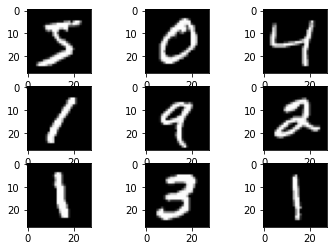

In [ ]:
# Cargar el dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# Imprimir un resumen de los datos
print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))
# Plotear las primeras imágenes
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# Normalizamos las imágenes
train_X_n = (train_X / 255) - 0.5
test_X_n = (test_X / 255) - 0.5

# Hacemos reshape de las imágenes para que tengan un canal
train_X_n = train_X.reshape((train_X_n.shape[0], 28, 28, 1))
test_X_n = test_X.reshape((test_X_n.shape[0], 28, 28, 1))

# también se puede hacer
#train_X_n = np.expand_dims(train_X_n, axis=3)
#test_X_n = np.expand_dims(test_X_n, axis=3)



### Entrenamos el modelo

Epoch 1/3
1875/1875 [==============================] - 18s 9ms/step - loss: 1.9040 - accuracy: 0.8881 - val_loss: 0.6144 - val_accuracy: 0.9269
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4212 - accuracy: 0.9400 - val_loss: 0.3161 - val_accuracy: 0.9527
Epoch 3/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2713 - accuracy: 0.9515 - val_loss: 0.2608 - val_accuracy: 0.9501
[7 2 1 0 4]
[7 2 1 0 4]


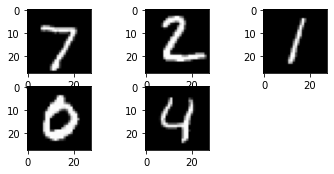

In [ ]:
# Entrenamos el modelo
model.fit(
  train_X_n,
  to_categorical(train_y),
  epochs=3,
  validation_data=(test_X_n, to_categorical(test_y)),
)

# Guardar el modelo al disco
#model.save_weights('cnn.h5')

# Cargar el modelo del disco
# model.load_weights('cnn.h5')

# Predecir las primeras 5 imágines del test set
predicciones = model.predict(test_X_n[:5])

# Imprimir las predicciones
print(np.argmax(predicciones, axis=1)) # [7, 2, 1, 0, 4]

# Chequear que son correctas
print(test_y[:5]) # [7, 2, 1, 0, 4]

# Plotear esas imágenes
for i in range(5):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(test_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________
None


### Ejercicio: hacer otra red que tenga:
1. Capa convolucional, 8 filtros de 3x3
2. Capa max pool
3. Capa convolucional, 16 filtros de 3x3
4. Capa max pool
5. Capa convolucional, 32 filtros de 3x3
6. Capa max pool
7. Flatten
8. Capa densa 
9. Salida

In [ ]:
# Armar el modelo
model = Sequential()
model.add(Conv2D(8, 3, input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(16, 3))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(32, 3))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))  

# Compilar el modelo
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)               

Epoch 1/3
1875/1875 [==============================] - 26s 14ms/step - loss: 1.1697 - accuracy: 0.8489 - val_loss: 0.3089 - val_accuracy: 0.9226
Epoch 2/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2302 - accuracy: 0.9381 - val_loss: 0.2233 - val_accuracy: 0.9381
Epoch 3/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1550 - accuracy: 0.9557 - val_loss: 0.1737 - val_accuracy: 0.9482
[7 2 1 0 4]
[7 2 1 0 4]


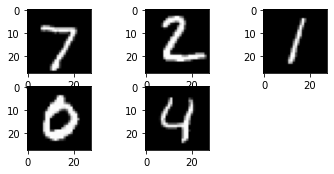

In [ ]:
# Entrenamos el modelo
model.fit(
  train_X_n,
  to_categorical(train_y),
  epochs=3,
  validation_data=(test_X_n, to_categorical(test_y)),
)

# Guardar el modelo al disco
#model.save_weights('cnn.h5')

# Cargar el modelo del disco
# model.load_weights('cnn.h5')

# Predecir las primeras 5 imágines del test set
predicciones = model.predict(test_X_n[:5])

# Imprimir las predicciones
print(np.argmax(predicciones, axis=1)) # [7, 2, 1, 0, 4]

# Chequear que son correctas
print(test_y[:5]) # [7, 2, 1, 0, 4]

# Plotear esas imágenes
for i in range(5):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(test_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
# Ejercicio: visualizar los filtros en las diferentes capas para ver qué features capturan

Para resolver esta parte me base en el siguiente [articulo:](https://github.com/gabrielpierobon/cnnshapes/blob/master/README.md)

In [ ]:
from keras import models

layer_outputs = [layer.output for layer in model.layers] # Extracts the outputs of all the layers of our last model
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input


Dimension de la capa de salida: (1, 26, 26, 8)


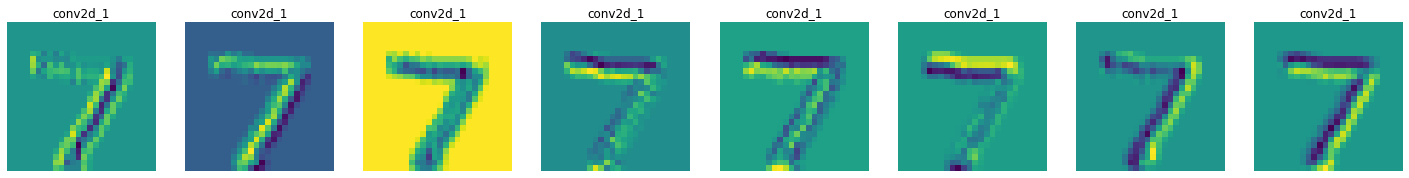

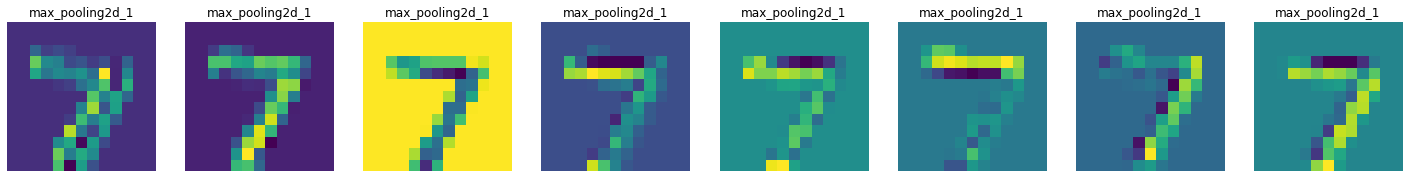

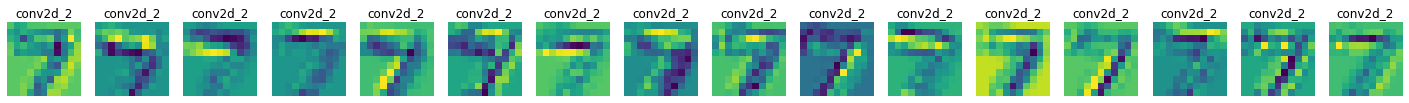

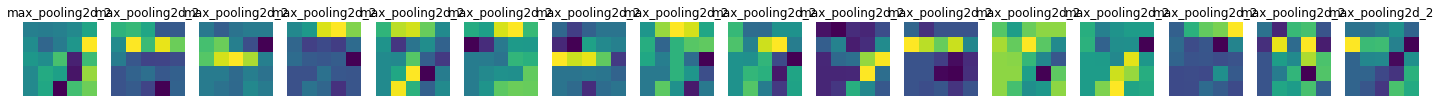

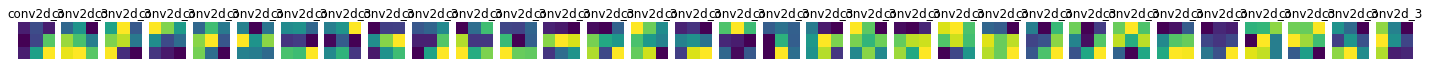

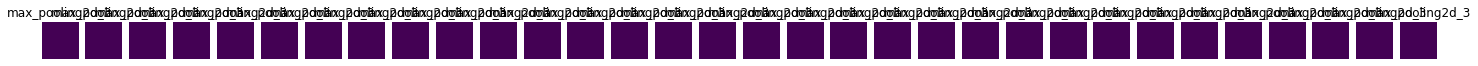

In [ ]:
activations = activation_model.predict(test_X[:1]) # Le meto una imagen del dataset a la nueva red
first_layer_activation = activations[0]

print('Dimension de la capa de salida:', first_layer_activation.shape)

layer_names = []
for layer in model.layers:
  layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

# Recorro todas las activaciones salvo la ultima ya que esta es una capa densa

layer_idx = 0

for activation in activations[:-2]:

  activ_shape = activation.shape
  # Extraigo la ultima dimension (cantidad de elementos en el volumen)
  ndims = activ_shape[-1]

  pyplot.figure(figsize=(25,25))

  for i in range(ndims):

    pyplot.subplot(1,ndims,i+1)
    pyplot.imshow(activation[0, :, :, i], cmap='viridis')
    pyplot.axis('off')
    pyplot.title(layer_names[layer_idx])
  pyplot.show()  
  
  layer_idx += 1

Podemos ver que la salida de la 1er capa tiene una dimension acorde a lo esperado: Una imagen de 28x28x1 pasa por la 1er capa convolucional compuesta por 8 filtros de 3x3. La salida de esta primer capa es un 'volumen' de 8 imagenes de 26x26 (ya que es una 'valid convolution'). Al visualizar las activaciones se observa un resultado esperado a lo estudiado durante las primeras clases teoricas: La primer capa convolucional funciona como un extractor de bordes, pero a medida que nos adentramos dentro de la red las features que aprende se vuelven mas abstractas.
